In [45]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



dir_data = 'data'
dir_output = 'output'

df = pd.read_csv(os.path.join(dir_data, 'herodata.csv'))
df = df.loc[df['role'] != 'Support']
df = df.drop(['speed', 'sight', 'life_scale', 'life_regenScale', 'weapon_damageScale'], axis=1)

# keep most important features
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount']]
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount', 'weapon_range']]


In [46]:

X = df.drop(['hero', 'role'], axis=1)
y = df[['role']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


clf = RandomForestClassifier(n_estimators=500, max_depth=5)
clf.fit(X_train, y_train)


# Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# print results of predict
print('Actual - Prediction')
for yt, yp in zip(y_test.to_numpy(), y_pred):
    print(yt[0], '-', yp)

prediction_proba = clf.predict_proba(X_test)
print(prediction_proba)


C:\Users\bxjxr\AppData\Local\Temp/ipykernel_2156/110422097.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy: 0.8461538461538461
Actual - Prediction
Melee Assasin - Bruiser
Ranged Assasin - Ranged Assasin
Tank - Tank
Melee Assasin - Melee Assasin
Healer - Healer
Bruiser - Bruiser
Melee Assasin - Bruiser
Ranged Assasin - Ranged Assasin
Bruiser - Bruiser
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Melee Assasin - Bruiser
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Melee Assasin - Melee Assasin
Bruiser - Bruiser
Ranged Assasin - Ranged Assasin
Tank - Tank
Ranged Assasin - Ranged Assasin
Healer - Healer
Tank - Tank
Ranged Assasin - Ranged Assasin
Healer - Healer
Tank - Bruiser
[[5.11602683e-01 1.54394172e-01 1.72889887e-01 1.02482929e-01
  5.86303294e-02]
 [3.87533911e-02 6.21513986e-02 1.23346248e-01 7.69103508e-01
  6.64545455e-03]
 [2.84292582e-01 7.35664336e-04 2.85721925e-02 6.25000000e-03
  6.80149561e-01]
 [1.95587662e-01 1.73858522e-01 3.16094961e-01 2.69443254e-01
  4.50156011

No handles with labels found to put in legend.


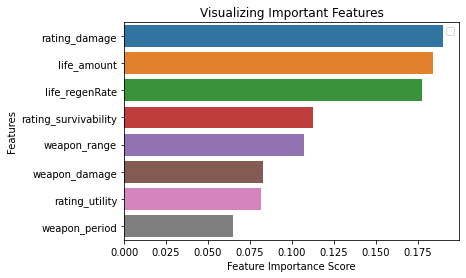

In [47]:
# Evaluate Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=df.columns[2:]).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [48]:
# save model to disk
pickle.dump(clf, open('rf_model.sav', 'wb'))

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)
print("Accuracy on Test Data:", metrics.accuracy_score(y_train, gnb_train_pred))
print("Accuracy on Training Data:", metrics.accuracy_score(y_test, gnb_test_pred))
prediction_proba = clf.predict_proba(X_test)

Accuracy on Test Data: 0.7966101694915254
Accuracy on Training Data: 0.7307692307692307


c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [50]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB().fit(X_train, y_train)
gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)
print("Accuracy on Test Data:", metrics.accuracy_score(y_train, gnb_train_pred))
print("Accuracy on Training Data:", metrics.accuracy_score(y_test, gnb_test_pred))

Accuracy on Test Data: 0.6440677966101694
Accuracy on Training Data: 0.5769230769230769


c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
